# Digit Recognizer

## Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

## Challenge

In this competition, your goal is to **correctly identify digits from a dataset of tens of thousands of handwritten images**. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Train Data

In [2]:
data = pd.read_csv("train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

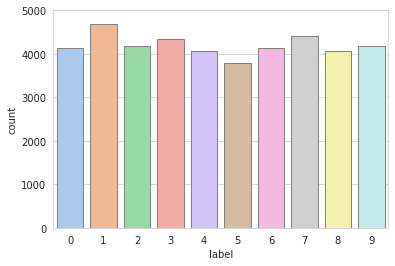

In [4]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.countplot(data['label'], palette="pastel", linewidth=1, edgecolor="grey")
plt.ylim(0, 5000);

In [5]:
# Normalization of features
# Would be the same as features/255 in this case
scaler = MinMaxScaler()
features = data.drop('label', 1)
scaler.fit(features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X = scaler.transform(features)
y = data['label']

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (34020, 784)
y_train shape: (34020,)
X_test shape: (4200, 784)
y_test shape: (4200,)


## CNN building

In [9]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(32, 5, activation="relu", padding="same",
        input_shape=[28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

## Results

In [12]:
history = model.fit(X_train.reshape(-1,28,28,1), y_train, epochs=5,
                    validation_data=(X_val.reshape(-1,28,28,1), y_val))

Train on 34020 samples, validate on 3780 samples
Epoch 1/5
34020/34020 [==============================] - 76s 2ms/sample - loss: 0.3940 - accuracy: 0.8817 - val_loss: 0.0705 - val_accuracy: 0.9780
Epoch 2/5
34020/34020 [==============================] - 75s 2ms/sample - loss: 0.1465 - accuracy: 0.9579 - val_loss: 0.0721 - val_accuracy: 0.9810
Epoch 3/5
34020/34020 [==============================] - 75s 2ms/sample - loss: 0.1250 - accuracy: 0.9636 - val_loss: 0.0513 - val_accuracy: 0.9868
Epoch 4/5
34020/34020 [==============================] - 75s 2ms/sample - loss: 0.0983 - accuracy: 0.9723 - val_loss: 0.0424 - val_accuracy: 0.9884
Epoch 5/5
34020/34020 [==============================] - 80s 2ms/sample - loss: 0.0942 - accuracy: 0.9736 - val_loss: 0.0417 - val_accuracy: 0.9892


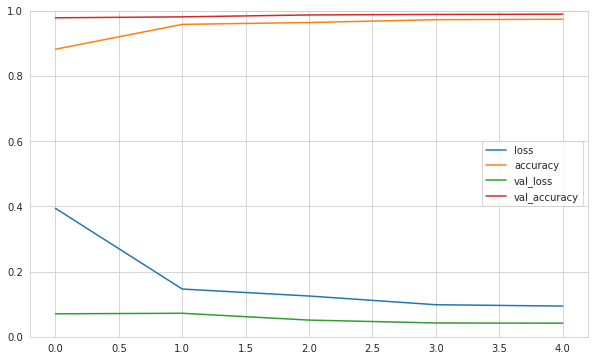

In [13]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1);

In [14]:
model.evaluate(X_test.reshape(-1,28,28,1), y_test)

4200/4200 [==============================] - 2s 518us/sample - loss: 0.0601 - accuracy: 0.9864


[0.06013852179808531, 0.98642856]

In [15]:
y_pred = model.predict_classes(X_test.reshape(-1,28,28,1))

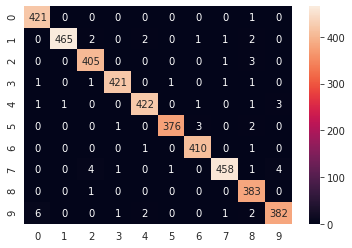

In [16]:
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

Building model with full training data to maximize prediction accuracy.

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37800/37800 [==============================] - 85s 2ms/sample - loss: 0.0846 - accuracy: 0.9763 - val_loss: 0.0552 - val_accuracy: 0.9883
Epoch 2/15
37800/37800 [==============================] - 84s 2ms/sample - loss: 0.0776 - accuracy: 0.9792 - val_loss: 0.0487 - val_accuracy: 0.9874
Epoch 3/15
37800/37800 [==============================] - 84s 2ms/sample - loss: 0.0694 - accuracy: 0.9802 - val_loss: 0.0373 - val_accuracy: 0.9912
Epoch 4/15
37800/37800 [==============================] - 85s 2ms/sample - loss: 0.0622 - accuracy: 0.9819 - val_loss: 0.0497 - val_accuracy: 0.9907
Epoch 5/15
37800/37800 [==============================] - 85s 2ms/sample - loss: 0.0606 - accuracy: 0.9826 - val_loss: 0.0336 - val_accuracy: 0.9926
Epoch 6/15
37800/37800 [==============================] - 85s 2ms/sample - loss: 0.0588 - accuracy: 0.9831 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 7/15
37800/37800 [==============================] -

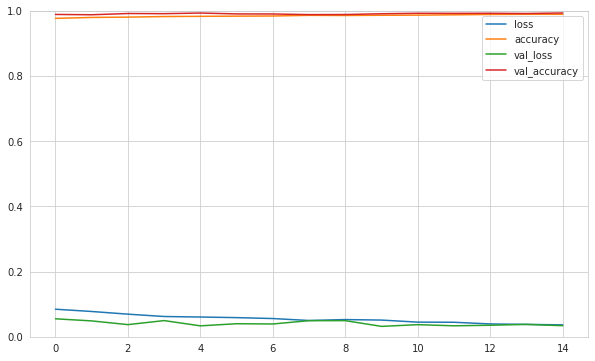

In [17]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.1, random_state=0)

history = model.fit(X_train.reshape(-1,28,28,1), y_train, epochs=15,
                    validation_data=(X_val.reshape(-1,28,28,1), y_val))

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1);

## Test Data

In [18]:
# Loading
testdata = pd.read_csv("test.csv")
testdata.shape # No label

(28000, 784)

In [19]:
# Apply transformer
testfeatures = scaler.transform(testdata)

In [20]:
# Predict labels
y_pred = model.predict_classes(testfeatures.reshape(-1,28,28,1))

In [21]:
# Writing submission for Kaggle Competition
submission = pd.DataFrame({
    'ImageId': list(range(1,28001)),
    'Label': y_pred.tolist()
})


submission.to_csv('submission.csv', header = True, index = False)